In [1]:
from bs4 import BeautifulSoup
import requests
import os
# Địa chỉ URL của trang tìm kiếm Google Images
GOOGLE_IMAGE = \
    'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'
data = input('What are you looking for? ')
url = GOOGLE_IMAGE + 'q=' + data
n_images = int(input('How many images do you want? '))
print('Start searching...')
# Tạo một yêu cầu HTTP và gửi yêu cầu đến trang web
response = requests.get(url)

# Chuyển đổi nội dung của trang web sang đối tượng BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Tìm tất cả các thẻ img trên trang web
images = soup.find_all('img',limit = n_images)

# Tạo một thư mục để lưu trữ ảnh
if not os.path.exists('images'):
    os.makedirs('images')

# Tải xuống các hình ảnh từ URL và lưu trữ trong thư mục 'images'
for i, image in enumerate(images):
    try:
        # Lấy URL của ảnh
        image_url = image['src']

        # Tải xuống ảnh từ URL
        response = requests.get(image_url)

        # Tạo một tên tập tin cho ảnh dựa trên số thứ tự
        filename = 'images/image{}.jpg'.format(i)

        # Lưu trữ ảnh tải xuống trong thư mục 'images'
        with open(filename, 'wb') as f:
            f.write(response.content)
    except:
        pass
        print("Done")

What are you looking for? cat
How many images do you want? 10
Start searching...
Done


In [6]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import time

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [17]:
from bs4 import BeautifulSoup
import requests
import os

class ImageScraper:
    GOOGLE_IMAGE = 'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'

    def __init__(self):
        self.data = ''
        self.n_images = 0
        
    def input_data(self, data, n_images):
        self.data = data
        self.n_images = n_images
    
    def search_images(self):
        url = self.GOOGLE_IMAGE + 'q=' + self.data
        print('Start searching...')
        response = requests.get(url, verify = False)
        soup = BeautifulSoup(response.content, 'html.parser')
        images = soup.find_all('img', limit=self.n_images+1)
        if not os.path.exists('images'):
            os.makedirs('images')

        for i, image in enumerate(images):
            try:
                image_url = image['src']
                response = requests.get(image_url)
                filename = 'images/image{}.jpg'.format(i)
                with open(filename, 'wb') as f:
                    f.write(response.content)
            except:
                pass
                print('Done')
if __name__ == '__main__':
    data = input('What are you looking for? ')
    n_images = int(input('How many images do you want? '))
    scraper = ImageScraper()
    scraper.input_data(data, n_images)
    scraper.search_images()

What are you looking for? dog
How many images do you want? 30


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20204\625032337.py:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(chromePath)


Start searching...
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [ ]:
from bs4 import BeautifulSoup
import requests
import os
from io import BytesIO
import matplotlib.pyplot as plt

class ImageScraper:
    GOOGLE_IMAGE = 'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'

    def __init__(self):
        self.data = ''
        self.n_images = 0
        
    def input_data(self, data, n_images):
        self.data = data
        self.n_images = n_images
    
    def search_images(self):
        url = self.GOOGLE_IMAGE + 'q=' + self.data
        print('Start searching...')
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        images = soup.find_all('img', limit=self.n_images+1)
        folder_name = self.data.replace(' ', '_')

        folder_name1 = os.path.join(self.data, 'Train')
        folder_name2 = os.path.join(self.data, 'Test')
        if not os.path.exists(folder_name1):
            os.makedirs(folder_name1)

        if not os.path.exists(folder_name2):
            os.makedirs(folder_name2)
            
        n_images = len(images)
        n_images_1 = n_images // 4 # 25% ảnh vào folder train
        n_images_2 = n_images - 2*n_images_1 # 50% ảnh vào folder test

        for i, image in enumerate(images):
            try:
                image_url = image['src']
                response = requests.get(image_url)
                if i < n_images_1 or i >= n_images - n_images_1: # 25% đầu và 25% cuối vào train
                    folder_name = folder_name1
                else: # 50% ở giữa vào test
                    folder_name = folder_name2
                filename = f'{folder_name}/image_{i}.jpg'
                with open(filename, 'wb') as f:
                    f.write(response.content)
            except:
                pass
                print('Done')
   
if __name__ == '__main__':
    data = input('What are you looking for? ')
    n_images = int(input('How many images do you want? '))
    scraper = ImageScraper()
    scraper.input_data(data, n_images)
    scraper.search_images()

In [9]:
from bs4 import BeautifulSoup
import requests
import os
import matplotlib.pyplot as plt
import shutil

In [44]:

class ImageScraper:
    GOOGLE_IMAGE = 'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'

    def __init__(self):
        self.data = ''
        self.n_images = 0
        self.folder_Train = ''
        
    def input_data(self, data, n_images):
        self.data = data
        self.n_images = n_images
    
    def search_images(self):
        url = self.GOOGLE_IMAGE + 'q=' + self.data + '&start=' + str(self.start) + '&end=' + str(self.end)
        print('Start searching...')
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        images = soup.find_all('img', limit=self.n_images+1)
        folder_name = self.data.replace(' ', '_')
        print(len(images))
        folder_name1 = os.path.join(self.data, 'Train')
        folder_name2 = os.path.join(self.data, 'Test')
        self.folder_Train = folder_name1
        
        if not os.path.exists(folder_name1):
            os.makedirs(folder_name1)

        if not os.path.exists(folder_name2):
            os.makedirs(folder_name2)
        
        n_images = len(images)
        n_images_1 = n_images // 4 # 25% ảnh vào folder train
        n_images_2 = n_images - 2*n_images_1 # 50% ảnh vào folder test

        for i, image in enumerate(images):
            try:
                image_url = image['src']
                response = requests.get(image_url)
                if i < n_images_1 or i >= n_images - n_images_1: # 25% đầu và 25% cuối vào train
                    folder_name = folder_name1
                else: # 50% ở giữa vào test
                    folder_name = folder_name2
                filename = f'{folder_name}/image_{i}.jpg'
                with open(filename, 'wb') as f:
                    f.write(response.content)
            except:
                pass
                print('Done')
    def data_label(self):
        image_files = os.listdir(self.folder_Train)
        image_paths = [os.path.join(self.folder_Train, filename) for filename in image_files]
        
        true_images = []
        false_images = []
        for i, image_path in enumerate(image_paths):
            image = plt.imread(image_path)
            plt.imshow(image/255)
            plt.show()
            n = int(input('loai nao?'))
            if(n==1):
                true_images.append(image_files[i])
            else:
                false_images.append(image_files[i])

        folder_True = os.path.join(self.folder_Train, 'True')
        folder_False = os.path.join(self.folder_Train, 'False')
        
        if not os.path.exists(folder_True):
            os.makedirs(folder_True)

        if not os.path.exists(folder_False):
            os.makedirs(folder_False)
            
        for image_name in true_images:
            src = os.path.join(self.folder_Train, image_name)
            dst = os.path.join(folder_True, image_name)
            shutil.move(src, dst)

        for image_name in false_images:
            src = os.path.join(self.folder_Train, image_name)
            dst = os.path.join(folder_False, image_name)
            shutil.move(src, dst)

In [45]:
if __name__ == '__main__':
    data = input('What are you looking for? ')
    n_images = int(input('How many images do you want? '))
    scraper = ImageScraper()
    scraper.input_data(data, n_images)
    scraper.search_images()
    

What are you looking for? fish
How many images do you want? 100
Start searching...
21
Done


### Sửa ngày 10/3/2023

In [2]:
import os
import random
import shutil

class GoogleImageScraper2:
    GOOGLE_IMAGE = 'https://www.google.com/search?site=&tbm=isch&source=hp&q='

    def __init__(self):
        self.data = ''
        self.n_images = 0
        self.folder_Train = ''

    def input_data(self, data, n_images):
        self.data = data
        self.n_images = n_images
    def search_images(self):
        folder_name = self.data.replace(' ', '_')
        self.folder_data = folder_name
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        print('Start searching...')
        folder_name1 = os.path.join(self.data, 'Train')
        folder_name2 = os.path.join(self.data, 'Test')
        self.folder_Train = folder_name1
        
        if not os.path.exists(folder_name1):
            os.makedirs(folder_name1)

        if not os.path.exists(folder_name2):
            os.makedirs(folder_name2)
        
        for i in range(0, self.n_images, 20):
            start = i
            end = min(i+20, self.n_images)
            url = self.GOOGLE_IMAGE + self.data + '&start=' + str(start) + '&end=' + str(end)
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'html.parser')
            images = soup.find_all('img', limit=20)
            
            for j, image in enumerate(images):
                try:
                    image_url = image['src']
                    response = requests.get(image_url)
                    if(j%2==0):
                        folder_name = folder_name1
                    else:
                        folder_name = folder_name2
                    filename = f'{folder_name}/image_{i+j}.jpg'
                    with open(filename, 'wb') as f:
                        f.write(response.content)
                except:
                    pass

        print('Done')
    def data_label(self):
        image_files = os.listdir(self.folder_Train)
        image_paths = [os.path.join(self.folder_Train, filename) for filename in image_files]
        
        true_images = []
        false_images = []
        for i, image_path in enumerate(image_paths):
            image = plt.imread(image_path)
            plt.imshow(image/255)
            plt.show()
            n = int(input('loai nao?'))
            if(n==1):
                true_images.append(image_files[i])
            else:
                false_images.append(image_files[i])

        folder_True = os.path.join(self.folder_Train, 'True')
        folder_False = os.path.join(self.folder_Train, 'False')
        
        if not os.path.exists(folder_True):
            os.makedirs(folder_True)

        if not os.path.exists(folder_False):
            os.makedirs(folder_False)
            
        for image_name in true_images:
            src = os.path.join(self.folder_Train, image_name)
            dst = os.path.join(folder_True, image_name)
            shutil.move(src, dst)

        for image_name in false_images:
            src = os.path.join(self.folder_Train, image_name)
            dst = os.path.join(folder_False, image_name)
            shutil.move(src, dst)

In [24]:
# starfish
# volcano
# corn
# banana
# balloon
# zebra
# castle
# sunglass
# pizza
# sock
if __name__ == '__main__':
    data = input('What are you looking for? ')
    n_images = int(input('How many images do you want? '))
    scraper = GoogleImageScraper2()
    scraper.input_data(data, n_images)
    scraper.search_images()
    

What are you looking for? sock
How many images do you want? 50
Start searching...
Done


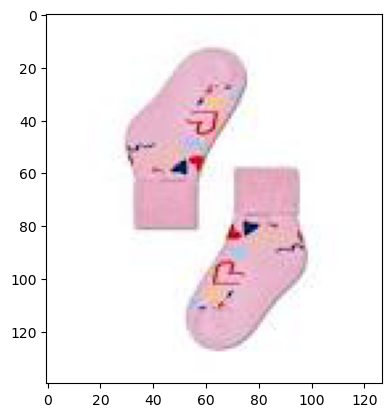

loai nao?1


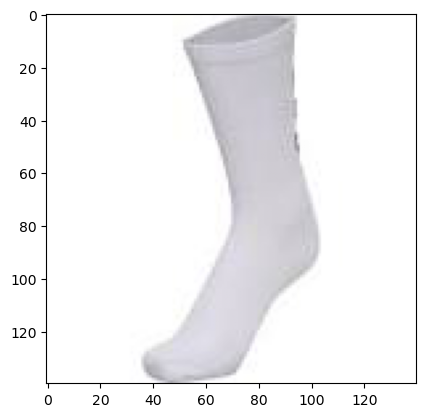

loai nao?1


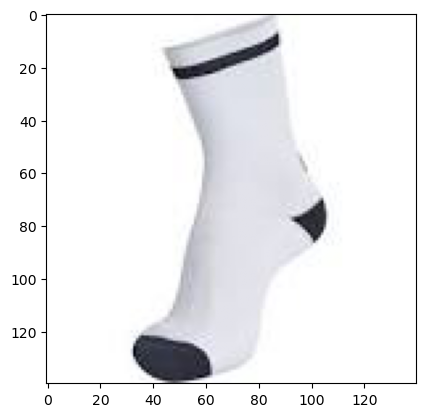

loai nao?1


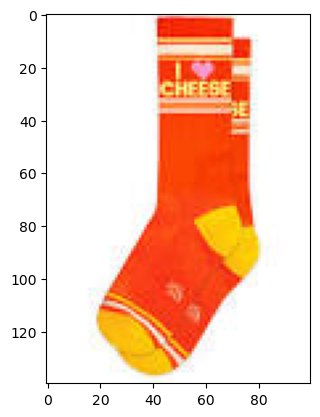

loai nao?1


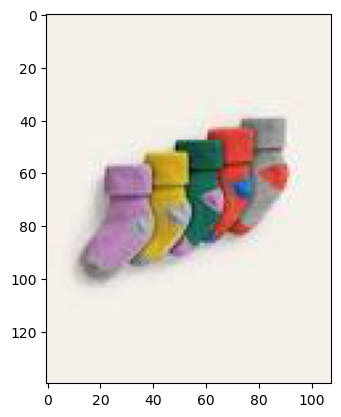

loai nao?1


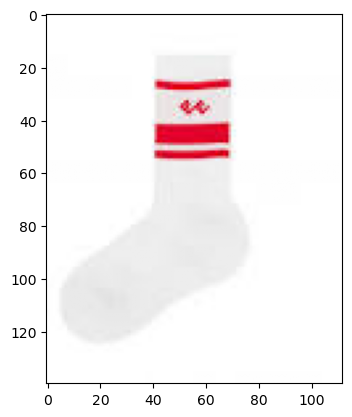

loai nao?1


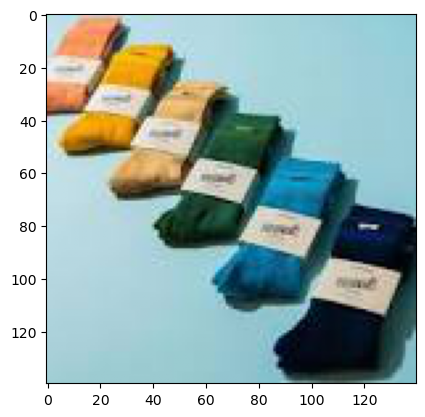

loai nao?1


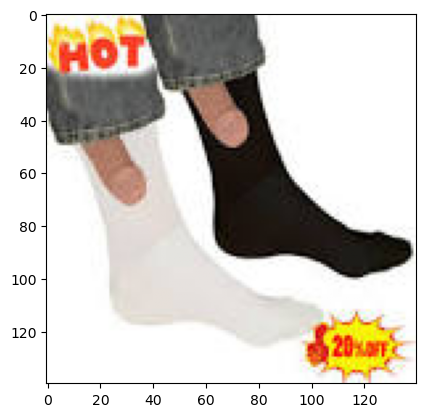

loai nao?1


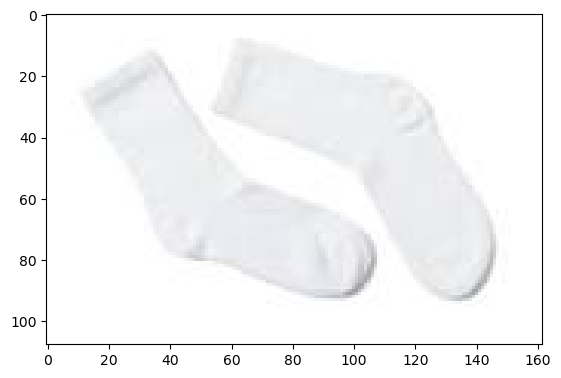

loai nao?1


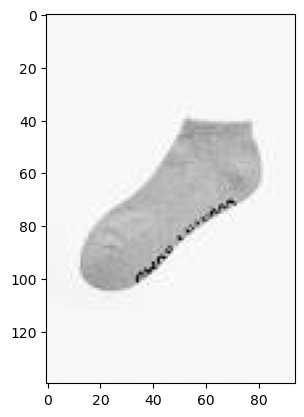

loai nao?1


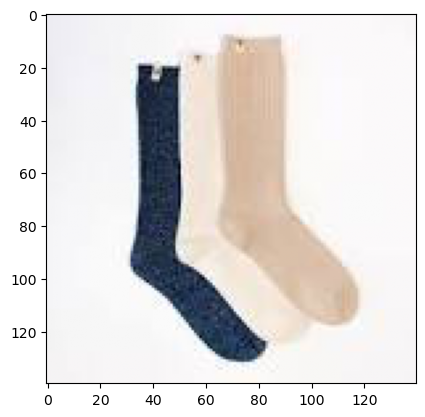

loai nao?1


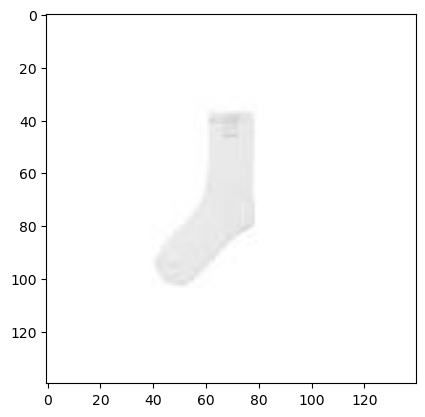

loai nao?1


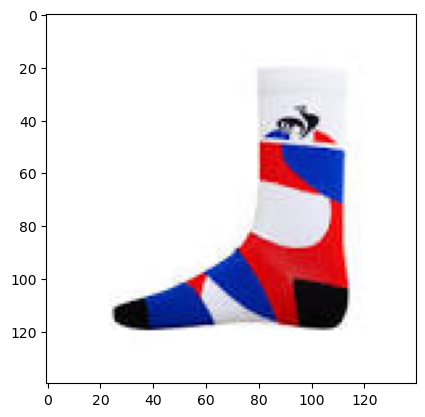

loai nao?1


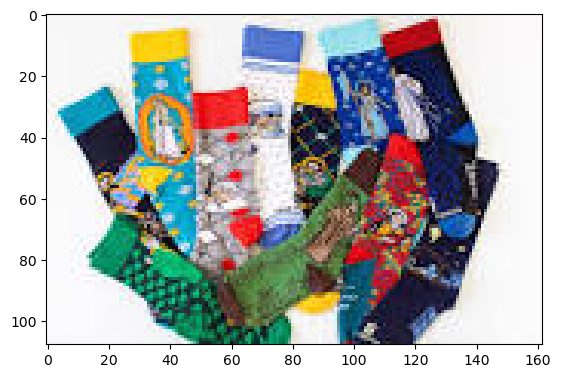

loai nao?1


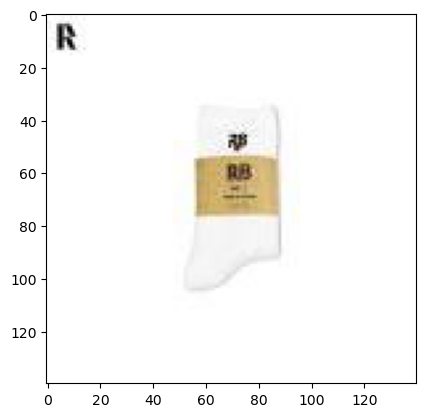

loai nao?1


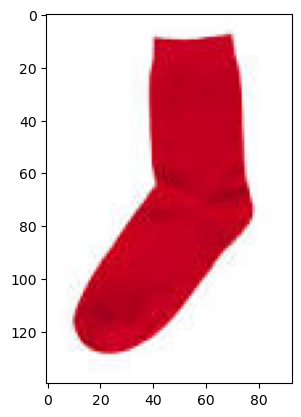

loai nao?1


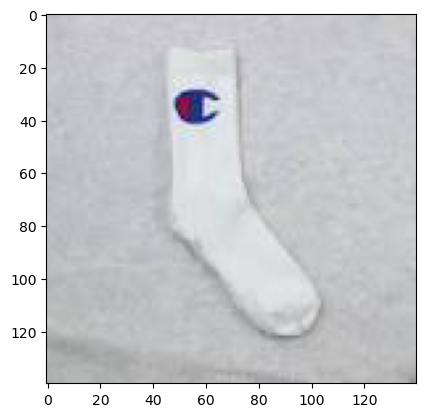

loai nao?1


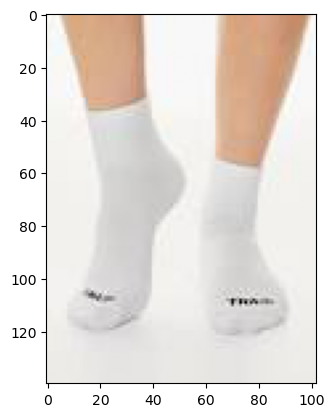

loai nao?1


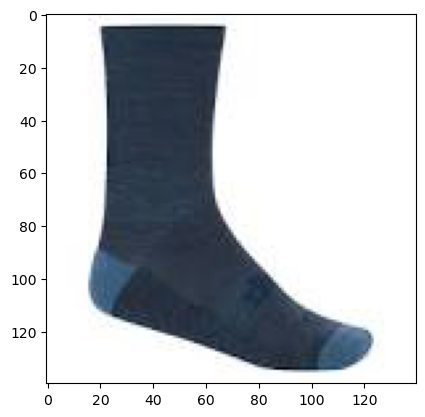

loai nao?1


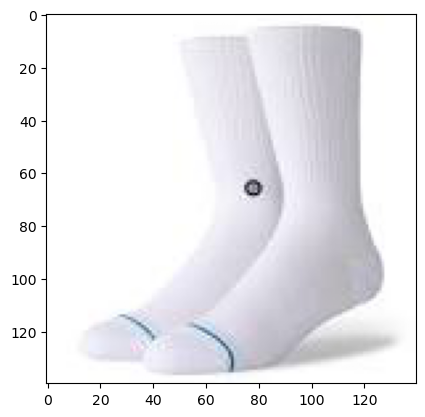

loai nao?1


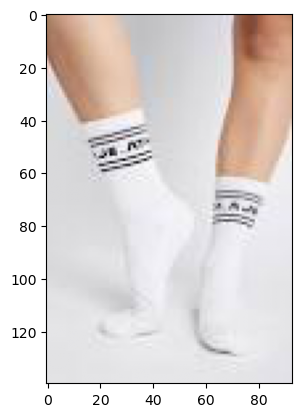

loai nao?1


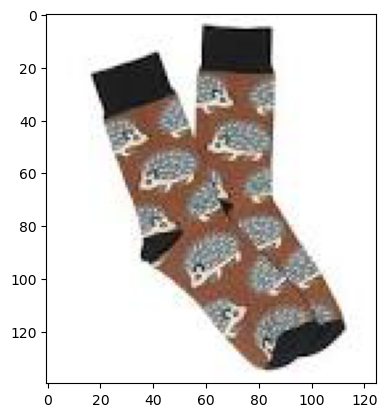

loai nao?1


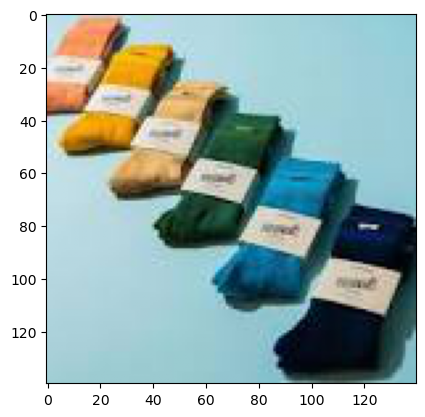

loai nao?1


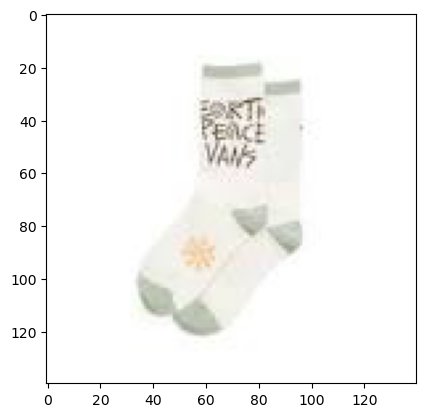

loai nao?1


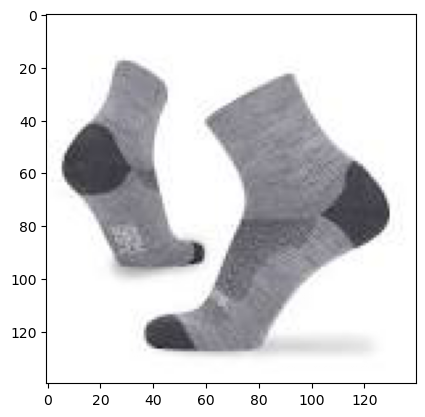

loai nao?1


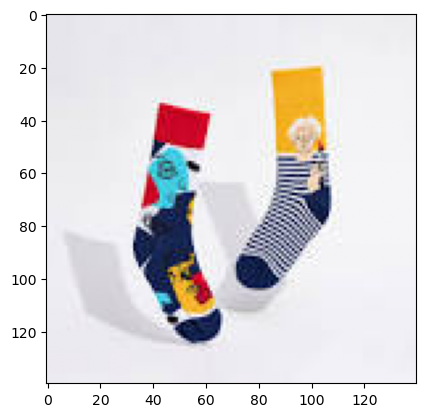

loai nao?1


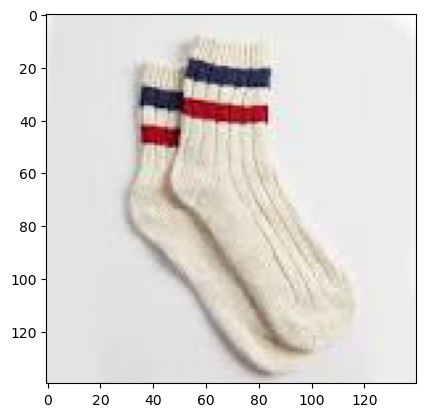

loai nao?1


In [25]:
scraper.data_label()